In [1]:
import pandas as pd

In [2]:
df_predi =pd.read_csv('newdata/datasetreco.csv',delimiter=';')

In [3]:
df_predi

,Date,Time,event_type,user_id,user_session,product_id,price,category,subcategory,subsubcategory,is_view,is_cart,is_purchase,p_views,p_carts,p_purchases,user_views,user_carts,user_purchases
0,2020-09-24,12:02:19,view,1515915625519390366,F71OG8wWVP,3828758,21.59,electronics,audio,acoustic,1,0,0,372,1,0,1,0,0
1,2020-09-24,12:22:49,view,1515915625519398031,hq3JGndGca,1271549,405.65,electronics,audio,acoustic,1,0,0,365,1,0,1,0,0
2,2020-09-24,12:48:31,view,1515915625519407618,JB3Sy5LCfb,124712,204.79,electronics,audio,acoustic,1,0,0,513,68,61,2,1,1
3,2020-09-24,12:49:34,view,1515915625519407618,bRZAHDpYFC,124712,204.79,electronics,audio,acoustic,1,0,0,513,68,61,2,1,1
4,2020-09-24,12:50:22,cart,1515915625519407618,bRZAHDpYFC,124712,204.79,electronics,audio,acoustic,0,1,0,513,68,61,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305904,2021-02-28,22:12:03,view,1515915625611012647,i4cphLZzmV,3506321,11.86,computers,peripherals,wifi,1,0,0,151,0,0,1,0,0
305905,2021-02-28,22:51:09,view,1515915625611017316,iiyIldOJxy,3721154,327.43,computers,peripherals,wifi,1,0,0,427,25,18,1,0,0
305906,2021-02-28,23:06:42,view,1515915625611014848,34XnVqZSSp,3698949,31.17,computers,peripherals,wifi,1,0,0,12,1,0,2,0,0
305907,2021-02-28,23:08:23,view,1515915625611014848,34XnVqZSSp,673347,36.37,computers,peripherals,wifi,1,0,0,23,0,0,2,0,0


In [4]:
df_predi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305909 entries, 0 to 305908
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            305909 non-null  object 
 1   Time            305909 non-null  object 
 2   event_type      305909 non-null  object 
 3   user_id         305909 non-null  int64  
 4   user_session    305909 non-null  object 
 5   product_id      305909 non-null  int64  
 6   price           305909 non-null  float64
 7   category        305909 non-null  object 
 8   subcategory     305909 non-null  object 
 9   subsubcategory  305909 non-null  object 
 10  is_view         305909 non-null  int64  
 11  is_cart         305909 non-null  int64  
 12  is_purchase     305909 non-null  int64  
 13  p_views         305909 non-null  int64  
 14  p_carts         305909 non-null  int64  
 15  p_purchases     305909 non-null  int64  
 16  user_views      305909 non-null  int64  
 17  user_carts

In [5]:
df=df_predi


# Aggregate the counts of views, carts, and purchases for each product
agg_df = df.groupby('product_id').agg(
    p_views_sum=pd.NamedAgg(column='p_views', aggfunc='sum'),
    p_carts_sum=pd.NamedAgg(column='p_carts', aggfunc='sum'),
    p_purchases_sum=pd.NamedAgg(column='p_purchases', aggfunc='sum')
).reset_index()

# Calculate the rating
agg_df['rating'] = agg_df['p_views_sum'] * 1 + agg_df['p_carts_sum'] * 5 + agg_df['p_purchases_sum'] * 10

# Merge the rating back into the original dataframe
df = df.merge(agg_df[['product_id', 'rating']], on='product_id', how='left')

# Display the updated dataframe
print(df.head())


         Date      Time event_type              user_id user_session  \
0  2020-09-24  12:02:19       view  1515915625519390366   F71OG8wWVP   
1  2020-09-24  12:22:49       view  1515915625519398031   hq3JGndGca   
2  2020-09-24  12:48:31       view  1515915625519407618   JB3Sy5LCfb   
3  2020-09-24  12:49:34       view  1515915625519407618   bRZAHDpYFC   
4  2020-09-24  12:50:22       cart  1515915625519407618   bRZAHDpYFC   

   product_id   price     category subcategory subsubcategory  is_view  \
0     3828758   21.59  electronics       audio       acoustic        1   
1     1271549  405.65  electronics       audio       acoustic        1   
2      124712  204.79  electronics       audio       acoustic        1   
3      124712  204.79  electronics       audio       acoustic        1   
4      124712  204.79  electronics       audio       acoustic        0   

   is_cart  is_purchase  p_views  p_carts  p_purchases  user_views  \
0        0            0      372        1           

In [6]:
df

,Date,Time,event_type,user_id,user_session,product_id,price,category,subcategory,subsubcategory,is_view,is_cart,is_purchase,p_views,p_carts,p_purchases,user_views,user_carts,user_purchases,rating
0,2020-09-24,12:02:19,view,1515915625519390366,F71OG8wWVP,3828758,21.59,electronics,audio,acoustic,1,0,0,372,1,0,1,0,0,140621
1,2020-09-24,12:22:49,view,1515915625519398031,hq3JGndGca,1271549,405.65,electronics,audio,acoustic,1,0,0,365,1,0,1,0,0,135420
2,2020-09-24,12:48:31,view,1515915625519407618,JB3Sy5LCfb,124712,204.79,electronics,audio,acoustic,1,0,0,513,68,61,2,1,1,939246
3,2020-09-24,12:49:34,view,1515915625519407618,bRZAHDpYFC,124712,204.79,electronics,audio,acoustic,1,0,0,513,68,61,2,1,1,939246
4,2020-09-24,12:50:22,cart,1515915625519407618,bRZAHDpYFC,124712,204.79,electronics,audio,acoustic,0,1,0,513,68,61,2,1,1,939246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305904,2021-02-28,22:12:03,view,1515915625611012647,i4cphLZzmV,3506321,11.86,computers,peripherals,wifi,1,0,0,151,0,0,1,0,0,22801
305905,2021-02-28,22:51:09,view,1515915625611017316,iiyIldOJxy,3721154,327.43,computers,peripherals,wifi,1,0,0,427,25,18,1,0,0,344040
305906,2021-02-28,23:06:42,view,1515915625611014848,34XnVqZSSp,3698949,31.17,computers,peripherals,wifi,1,0,0,12,1,0,2,0,0,221
305907,2021-02-28,23:08:23,view,1515915625611014848,34XnVqZSSp,673347,36.37,computers,peripherals,wifi,1,0,0,23,0,0,2,0,0,529


In [7]:
df['rating']

0         140621
1         135420
2         939246
3         939246
4         939246
           ...  
305904     22801
305905    344040
305906       221
305907       529
305908       529
Name: rating, Length: 305909, dtype: int64

In [17]:
df_purchased = df[df["is_purchase"]>=1]

KeyError: ('user_id', 'events_tyoe')

In [18]:
df_purchased = df_purchased[['user_id','product_id','category','subcategory','subsubcategory','rating']]

In [19]:
df_purchased

,user_id,product_id,category,subcategory,subsubcategory,rating
5,1515915625519407618,124712,electronics,audio,acoustic,939246
18,1515915625519470631,857266,electronics,audio,acoustic,1102
39,1515915625519539652,1803560,electronics,audio,acoustic,1350
52,1515915625519581197,124712,electronics,audio,acoustic,939246
260,1515915625395198150,167423,electronics,audio,acoustic,41540
...,...,...,...,...,...,...
305629,1515915625608513470,673122,computers,peripherals,wifi,32079
305674,1515915625608758157,1803710,computers,peripherals,wifi,17020
305722,1515915625608513470,673122,computers,peripherals,wifi,32079
305752,1515915625609417292,3623542,computers,peripherals,wifi,21255


In [20]:
df_purchased.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15469 entries, 5 to 305761
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         15469 non-null  int64 
 1   product_id      15469 non-null  int64 
 2   category        15469 non-null  object
 3   subcategory     15469 non-null  object
 4   subsubcategory  15469 non-null  object
 5   rating          15469 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 846.0+ KB


In [30]:
df_purchased=df_purchased.drop_duplicates()


In [31]:
df_purchased.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 5 to 305761
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         10105 non-null  int64 
 1   product_id      10105 non-null  int64 
 2   category        10105 non-null  object
 3   subcategory     10105 non-null  object
 4   subsubcategory  10105 non-null  object
 5   rating          10105 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 552.6+ KB


In [32]:
pivot_table = df_purchased.pivot(index='product_id', columns='user_id', values='rating')
pivot_table = pivot_table.fillna(0)

In [33]:
pivot_table

user_id,1515915625353286099,1515915625353457259,1515915625353561691,1515915625353900095,1515915625354176736,1515915625354822642,1515915625354857951,1515915625355179497,1515915625355421833,1515915625355947830,...,1515915625610969297,1515915625610973155,1515915625610976222,1515915625610977027,1515915625610986148,1515915625610986825,1515915625610987171,1515915625610991774,1515915625610997879,1515915625610999486
product_id,,,,,,,,,,,,,,,,,,,,,
2365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5304170.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4183863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4183864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(pivot_table)

normalized_pivot_table = pd.DataFrame(normalized_data, index=pivot_table.index, columns=pivot_table.columns)

print(normalized_pivot_table)

user_id     1515915625353286099  1515915625353457259  1515915625353561691  \
product_id                                                                  
2365                        0.0                  0.0                  0.0   
3727                        0.0                  0.0                  0.0   
4279                        0.0                  0.0                  0.0   
6265                        0.0                  0.0                  0.0   
6476                        0.0                  0.0                  0.0   
...                         ...                  ...                  ...   
4183862                     0.0                  0.0                  0.0   
4183863                     0.0                  0.0                  0.0   
4183864                     0.0                  0.0                  0.0   
4183865                     0.0                  0.0                  0.0   
4183866                     0.0                  0.0                  0.0   

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_result = pca.fit_transform(normalized_data)

pca_df = pd.DataFrame(pca_result, index=pivot_table.index, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print(pca_df)

                 PC1       PC2       PC3       PC4       PC5       PC6  \
product_id                                                               
2365       -0.013555 -0.012462 -0.007303 -0.009064 -0.007145 -0.006749   
3727       -0.013521 -0.012410 -0.007272 -0.009012 -0.007100 -0.006697   
4279       -0.016263 -0.025790 -0.015510 -0.031146 -0.030821 -0.099450   
6265       -0.013521 -0.012410 -0.007272 -0.009012 -0.007100 -0.006697   
6476       -0.013910 -0.013013 -0.007634 -0.009627 -0.007628 -0.007314   
...              ...       ...       ...       ...       ...       ...   
4183862    -0.013487 -0.012358 -0.007241 -0.008960 -0.007056 -0.006646   
4183863    -0.015399 -0.002570 -0.007376 -0.010116 -0.012450  0.073950   
4183864    -0.014140 -0.013219 -0.007287 -0.009876 -0.008033 -0.004906   
4183865    -0.013521 -0.012410 -0.007272 -0.009012 -0.007100 -0.006697   
4183866    -0.013553 -0.012458 -0.007301 -0.009010 -0.007146 -0.006751   

                 PC7       PC8       

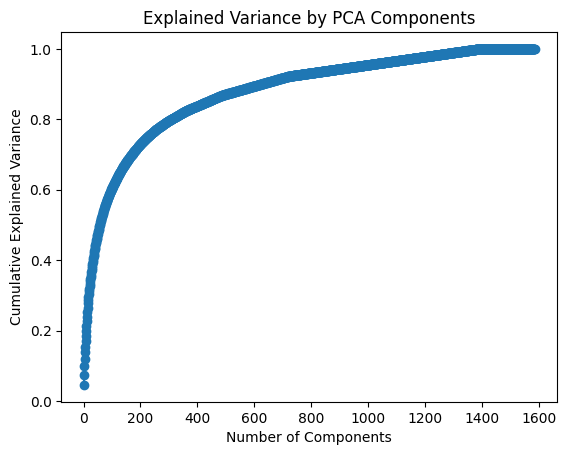

In [45]:
# Determine the amount of variance each principal component captures
pca = PCA().fit(normalized_data)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

In [48]:


# Compute the correlation matrix for the products in the reduced space
product_correlation_matrix = pd.DataFrame(pca_df.corr(), index=pca_df.columns, columns=pca_df.columns)
print(product_correlation_matrix)


AttributeError: module 'pandas' has no attribute 'Dataframe'